<a href="https://colab.research.google.com/github/roccaab/WaveletGAN/blob/main/ClsAnalisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

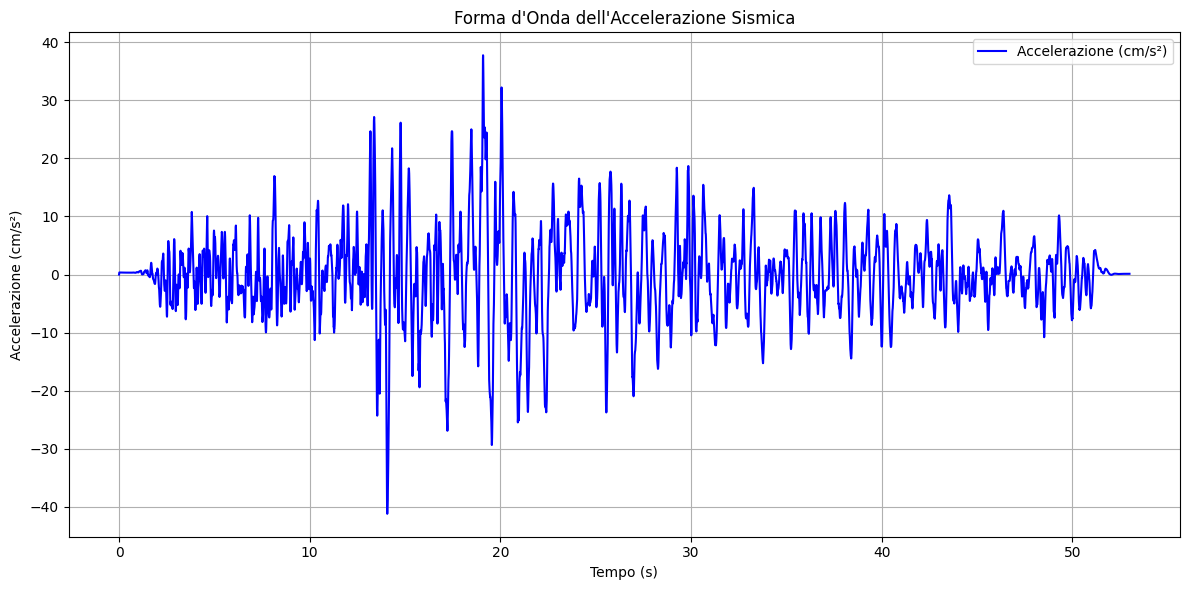

Durata del segnale: 53.01 s
PGA (Peak Ground Acceleration): 41.17 cm/s²
Energia del segnale: 3062.36 cm²/s³


<ipython-input-6-6f08a980865b>:49: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cumulative_energy = cumtrapz(data**2, time, initial=0)


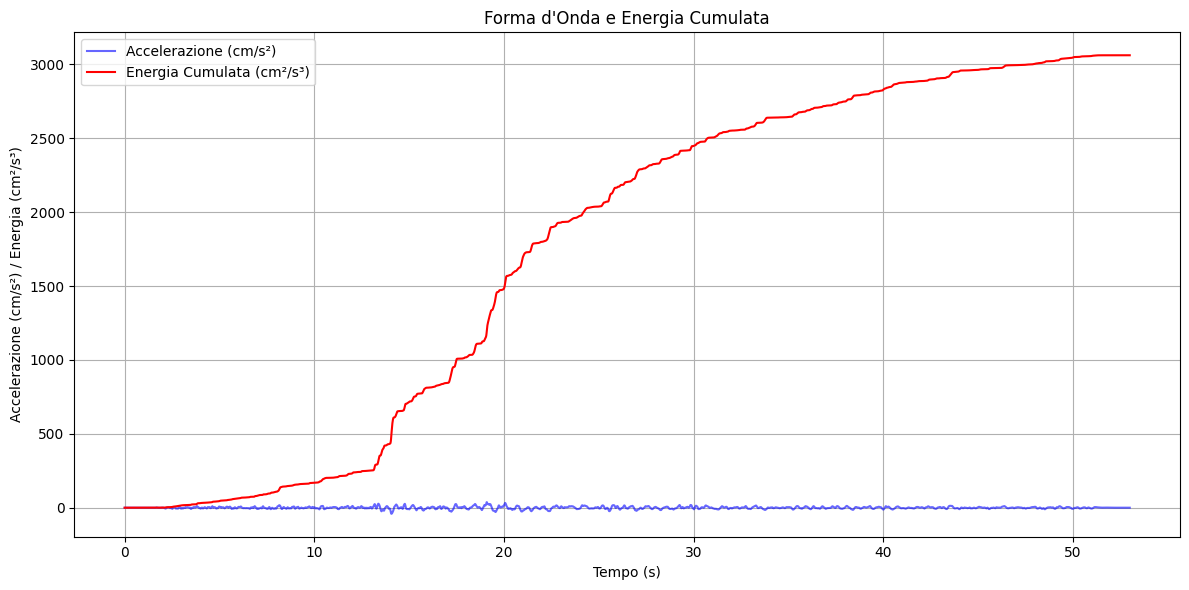

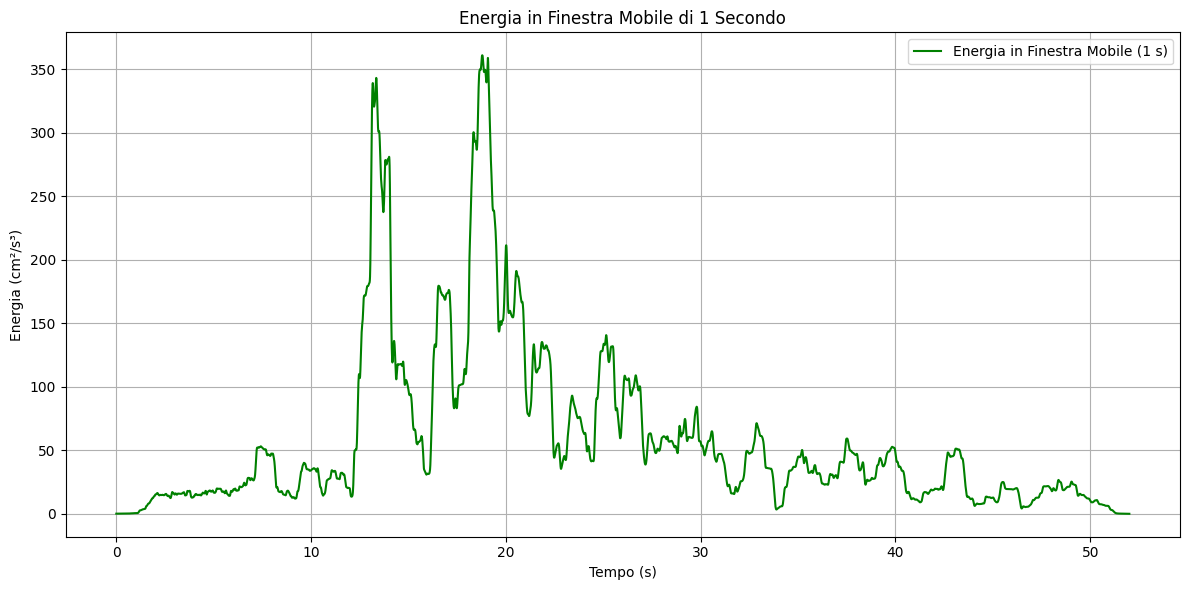

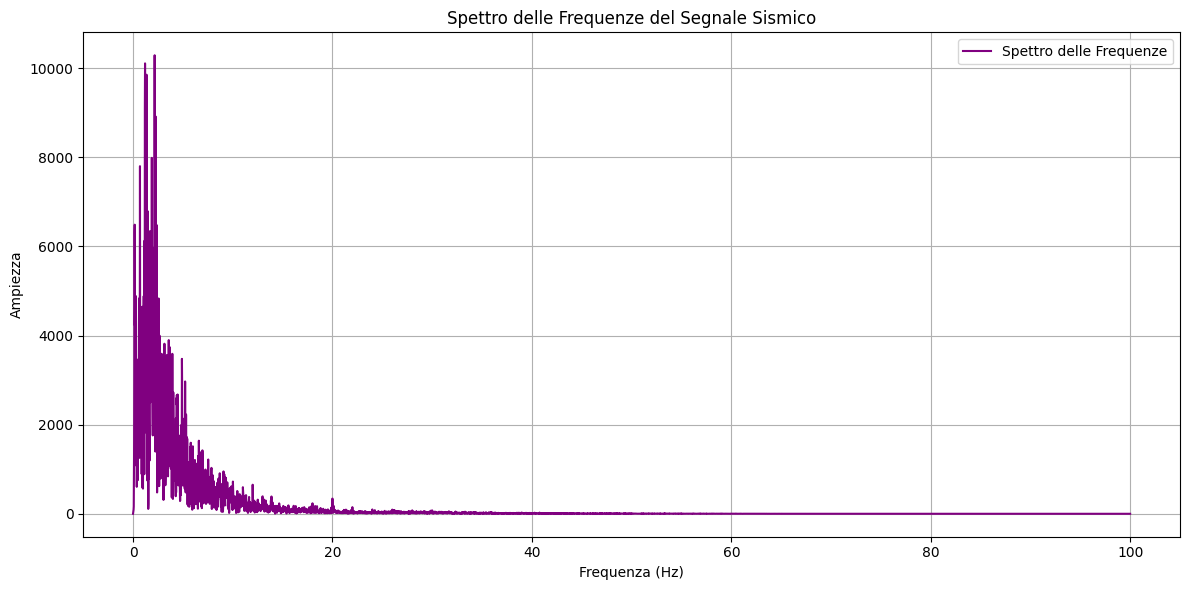

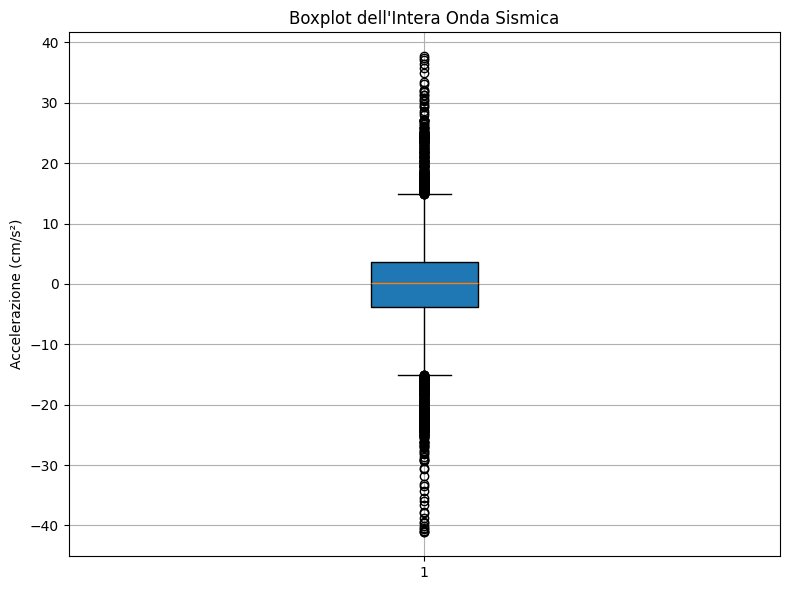

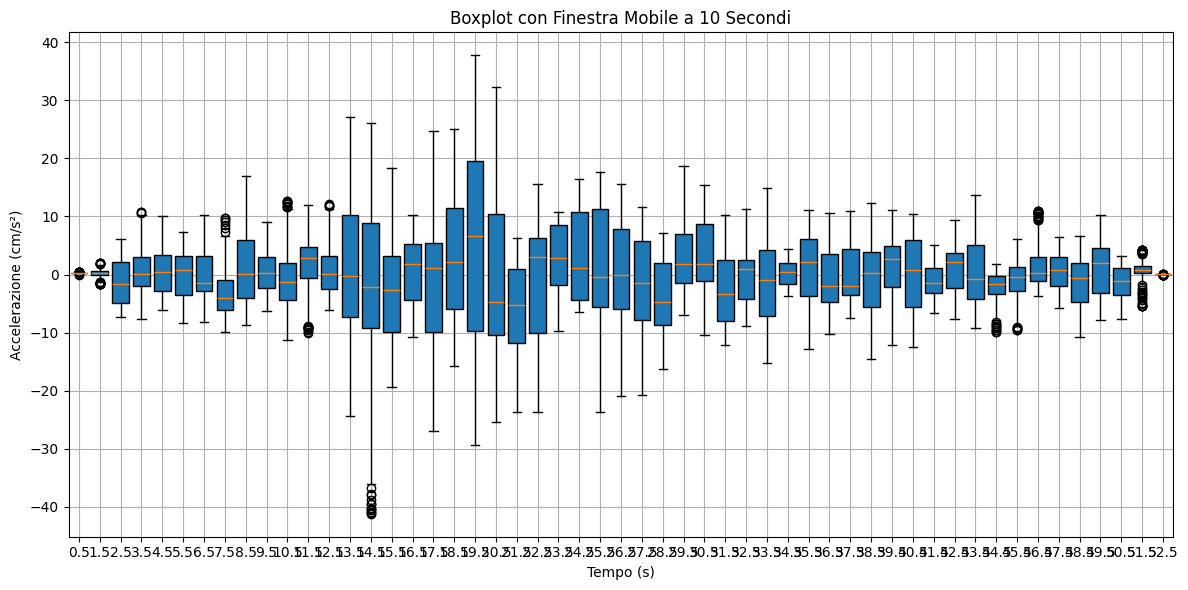

In [6]:
!pip install PyWavelets

import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# 1. LETTURA DEI DATI
# ===================
file_path = 'E2.ASC'
with open(file_path, 'r') as f:
    data = [float(line.strip()) for line in f]
data = np.array(data)
n = len(data)
dt = 0.005         # Passo di campionamento (0.005 secondi)
f_s = 1 / dt       # Frequenza di campionamento (200 Hz)
time = np.arange(n) * dt  # Vettore tempo in secondi

# 2. VISUALIZZAZIONE DELLA FORMA D'ONDA (ACCELERAZIONE)
# ====================================================
plt.figure(figsize=(12, 6))
plt.plot(time, data, label='Accelerazione (cm/s²)', color='blue')
plt.title("Forma d'Onda dell'Accelerazione Sismica")
plt.xlabel('Tempo (s)')
plt.ylabel('Accelerazione (cm/s²)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3. CALCOLO DELLE CARATTERISTICHE FISICHE
# ========================================
# Finestra mobile di 1 secondo
window_size = int(1 / dt)  # Numero di campioni in 1 secondo

# 3.1 Durata del segnale
duration = time[-1] - time[0]
print(f"Durata del segnale: {duration:.2f} s")

# 3.2 Ampiezza massima (PGA - Peak Ground Acceleration)
pga = np.max(np.abs(data))
print(f"PGA (Peak Ground Acceleration): {pga:.2f} cm/s²")

# 3.3 Energia del segnale (integrale dell'accelerazione quadratica)
energy = np.trapz(data**2, time)
print(f"Energia del segnale: {energy:.2f} cm²/s³")

# 3.4 Energia cumulata nel tempo
cumulative_energy = cumtrapz(data**2, time, initial=0)

# 3.5 Energia in finestra mobile di 1 secondo
window_energy = np.array([
    np.trapz(data[i:i+window_size]**2, time[i:i+window_size])
    for i in range(n - window_size)
])

# 4. VISUALIZZAZIONE DELL'ENERGIA CUMULATA E IN FINESTRA MOBILE
# ==============================================================
plt.figure(figsize=(12, 6))
plt.plot(time, data, label='Accelerazione (cm/s²)', color='blue', alpha=0.6)
plt.plot(time, cumulative_energy, label='Energia Cumulata (cm²/s³)', color='red')
plt.title("Forma d'Onda e Energia Cumulata")
plt.xlabel('Tempo (s)')
plt.ylabel("Accelerazione (cm/s²) / Energia (cm²/s³)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(time[:-window_size], window_energy, label='Energia in Finestra Mobile (1 s)', color='green')
plt.title("Energia in Finestra Mobile di 1 Secondo")
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (cm²/s³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 5. SPETTRO DELLE FREQUENZE
# ==========================
frequencies = np.fft.fftfreq(n, d=dt)
fft_values = np.fft.fft(data)
magnitude_spectrum = np.abs(fft_values)

# Considera solo le frequenze positive
positive_frequencies = frequencies[:n // 2]
positive_magnitude = magnitude_spectrum[:n // 2]

plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_magnitude, label='Spettro delle Frequenze', color='purple')
plt.title("Spettro delle Frequenze del Segnale Sismico")
plt.xlabel('Frequenza (Hz)')
plt.ylabel('Ampiezza')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 6. BOXPLOT DELL'INTERA ONDA SISMICA
# ==================================
plt.figure(figsize=(8, 6))
plt.boxplot(data, patch_artist=True)
plt.title("Boxplot dell'Intera Onda Sismica")
plt.ylabel('Accelerazione (cm/s²)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. BOXPLOT CON FINESTRA MOBILE A 10 SECONDI
# ==========================================
window_size_10 = int(1 / dt)  # Numero di campioni in 1 secondo
step = int(1 / dt)             # Step di 1 secondo per il calcolo della finestra mobile

boxplot_data = []
positions = []  # Posizioni (in secondi) per collocare ogni boxplot
for i in range(0, n - window_size_10 + 1, step):
    segment = data[i:i+window_size_10]
    boxplot_data.append(segment)
    # La posizione è il tempo centrale della finestra
    positions.append(time[i + window_size_10 // 2])

plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, positions=positions, widths=0.8, patch_artist=True)
plt.title("Boxplot con Finestra Mobile a 10 Secondi")
plt.xlabel('Tempo (s)')
plt.ylabel('Accelerazione (cm/s²)')
plt.grid(True)
plt.tight_layout()
plt.show()
